# OpenCV Basics
We will look at some Pythonic OpenCV core functions and show how to accomplish some basic tasks easily. 

## OpenCV package
The OpenCV package for python can be installed in several ways:
* CentOS:

    yum install numpy opencv*
    
* Windows: 

    pip install python
    
Once installed you should be able to import:

In [124]:
import cv2
print cv2.__version__

2.4.9


This tutorial assumes a 2.4.x version. 
## Documentation
The online documentation is essential when using this library: http://docs.opencv.org/2.4/

## Data Structures
OpenCV on python relies on Numpy data types for matrices, unlike the C version which has its own matric types. Each OpenCV function excepts to get matrices of specific types. Points and vectors have no special pythonic types and are represented as tuples.

### Gray Images
A grayscale image is represented as follows:

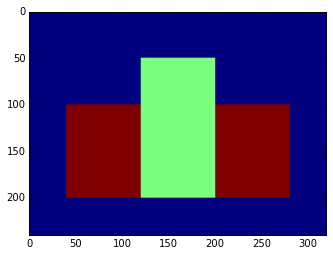

In [125]:
import numpy as np
%matplotlib inline
from pylab import *

img_gray = np.zeros((240, 320), dtype=np.uint8)

img_gray[100:200, 40:280] = 255
img_gray[50:200, 120:200] = 127
imshow(img_gray)


Some algorithms expect binary/logical images with true/false values. In these cases just pass a uint8 array where any non-zero value is considered "true" (usually 255)

The returned type is : float32


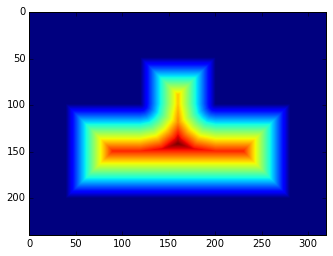

In [126]:
img_gray_dist = cv2.distanceTransform(img_gray, cv2.cv.CV_DIST_L2, 5)
print 'The returned type is :', img_gray_dist.dtype
imshow(img_gray_dist)

### Color images
Color images are represented as 3D array, where each depth layer represents a color channel. 

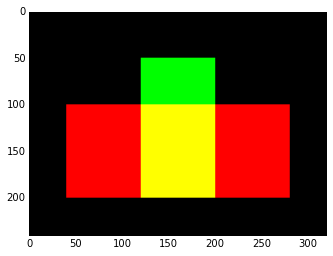

In [127]:
img_color = np.zeros((240, 320, 3), dtype=np.uint8)
img_color[100:200, 40:280, :] = (255, 0, 0)
img_color[50:200, 120:200, 1] = 255
imshow(img_color)

## Image Manipulation
Most of this course will cover different way to manipulate or analyze images. Here we only cover some essential skills:

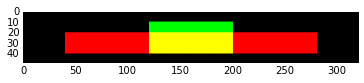

In [128]:
img_color_small = cv2.resize(img_color, None, fx=1, fy=0.2, interpolation=cv2.INTER_AREA)
imshow(img_color_small)

## Image IO
Image IO in OpenCV is similar in spririt to Matlab. By default images are read in OpenCV in BGR color space, which makes them look quite strange when using matplotlib's imshow:

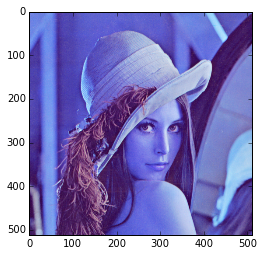

In [129]:
lena = cv2.imread(r'lena.png')
imshow(lena)

Many OpenCV functions expect BGR images. For instance, saving an image:

In [130]:
cv2.imwrite('lena_test.jpg', lena)
!lena_test.jpg

## Image Drawing
OpenCV provides many efficient raster drawing functions which are useful for both debugging and image manipulations

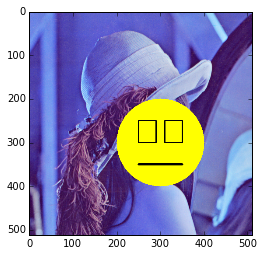

In [131]:
canvas = np.array(lena)
cv2.circle(canvas, center=(300,300), radius=100, color=(255,255,0), thickness=-1)
cv2.line(canvas, pt1=(250,350), pt2=(350,350), color=(0,0,0), thickness=3)
cv2.rectangle(canvas, pt1=(250,250), pt2=(290, 300), color=(0,0,0), thickness=2)
cv2.rectangle(canvas, pt1=(310,250), pt2=(350, 300), color=(0,0,0), thickness=2)
imshow(canvas)

## Video Capture
OpenCV comes with a built in video capture/writer which relies on ffmpeg. If the ffmpeg DLL/so isn't available it will fallback on native video API (e.g. vfw on windows) which might not support many formats. 
### Camera Capture

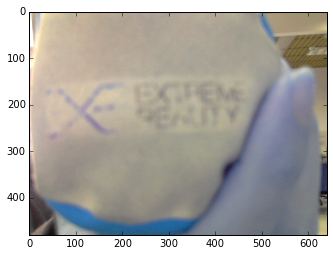

In [136]:
video_capture = cv2.VideoCapture(0) # Pass zero to get the first Camera device
state, img = video_capture.read()
imshow(img)
del video_capture

The ffmpeg can even read videos over network:

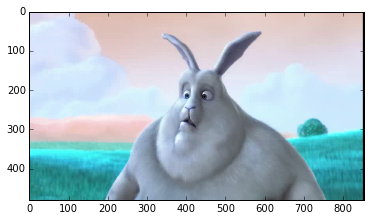

In [133]:
video_capture = cv2.VideoCapture(r'http://download.openbricks.org/sample/H264/big_buck_bunny_480p_H264_AAC_25fps_1800K_short.MP4')
state, img = video_capture.read()
imshow(img)
del video_capture

## HighGUI
OpenCV also comes with a minimalistic windowing kit that allows creating windows, showing images, waiting for keyboard input and some very basic gui components. These cannot be demonstrated in the notebook obviously...

In [134]:
video_capture = cv2.VideoCapture(r'http://download.openbricks.org/sample/H264/big_buck_bunny_480p_H264_AAC_25fps_1800K_short.MP4')

while True:
    state, img = video_capture.read()
    if not state:
        # 'Video is over'
        break
    cv2.imshow(winname='frame', mat=img)
    key = cv2.waitKey(30) # Wait for 30 milliseconds
    if key == 'q':
        # The key 'q' has been pressed
        break
cv2.destroyWindow('frame')


If you want to wait until any key is pressed, then you should write: cv2.waitkey(0)

## Resources 
* Lots of great tutorials: http://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_tutorials.html

## Summary
We only covered the basic capabilites the OpenCV library has to offer. The rest of the course would build on top of these basic capibilites.